<a href="https://colab.research.google.com/github/ishanbarway/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# <b>A. Data Preperation

####<b> Importing the required data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from google.colab import data_table
from vega_datasets import data
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

#### <b> Mounting Google Drive to excess the essential files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####<b>Creating path

In [ ]:
path= pd.read_csv('/content/drive/My Drive/Colab Notebooks/CAPSTONE PROJECT/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')

#<b> B. Data Exploration

#### <b> Reading the CSV File

In [ ]:
data_table.enable_dataframe_formatter()
path.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
path.info()
path.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

In [ ]:
#checking null values
path.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are some null values present in the data, for better data exploration thoese null values are replaced with some common value.

In [ ]:
path["name"].fillna("NoName",inplace=True)
path["host_name"].fillna("NoName",inplace=True)
path["last_review"].fillna("Notreviewed",inplace=True)
path["reviews_per_month"].fillna(0,inplace=True)

In [ ]:
path.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#<b> C. Exploratary Data Analysis

## <b>1. What can we learn about different hosts and areas?

####<b> Checking host percentage in the area

In [ ]:
data_table.disable_dataframe_formatter()
host_percentage = path.groupby(['neighbourhood_group', ])['calculated_host_listings_count'].count().reset_index()
host_percentage = host_percentage.sort_values(by= 'calculated_host_listings_count', ascending=False)
host_percentage

,neighbourhood_group,calculated_host_listings_count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


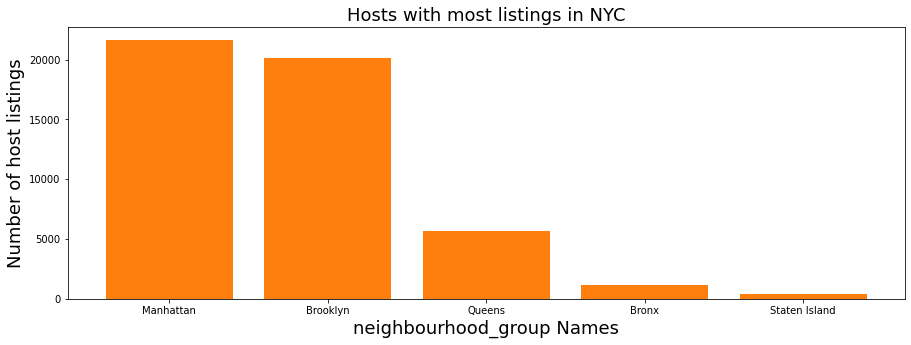

In [ ]:
# Visualizing the hosts with most listings.
plt.rcParams['figure.figsize'] = (15,5)
neighbourhood_group = host_percentage['neighbourhood_group']
host_lisitng = host_percentage['calculated_host_listings_count']
plt.bar(neighbourhood_group,host_lisitng)
plt.bar(neighbourhood_group, host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('neighbourhood_group Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

#### <b>Checking for most active locality in all the neighbourhood.

In [ ]:
locality = path.groupby([ 'neighbourhood','neighbourhood_group',])['calculated_host_listings_count'].count().reset_index()
l= locality.sort_values(by='calculated_host_listings_count',ascending=False).head(10)
l

,neighbourhood,neighbourhood_group,calculated_host_listings_count
214,Williamsburg,Brooklyn,3920
13,Bedford-Stuyvesant,Brooklyn,3714
94,Harlem,Manhattan,2658
28,Bushwick,Brooklyn,2465
202,Upper West Side,Manhattan,1971
95,Hell's Kitchen,Manhattan,1958
64,East Village,Manhattan,1853
201,Upper East Side,Manhattan,1798
51,Crown Heights,Brooklyn,1564
127,Midtown,Manhattan,1545


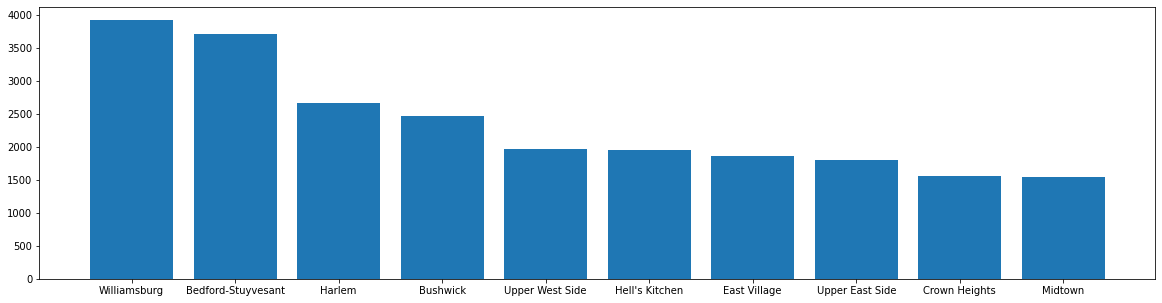

In [ ]:
plt.rcParams['figure.figsize'] = (20,5)
neighbourhood = l['neighbourhood']
host_lisitng = l['calculated_host_listings_count']
neighbourhood_group = l['neighbourhood_group']
lb= plt.bar(neighbourhood,host_lisitng)

The most active locality (neighbourhood) were from Brooklyn area which is Williamsburg & Bedford-Stuyvesant with 3920 & 3714 host listings count respectively. Brooklyn and Manhattan both has more active neighbourhood as compaired to other groups.

##<b>2. What can we learn from predictions? 

####<b>Average pricing based on apartment category in different neighbourhood

In [ ]:
avg_price= path.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()
avg_price

,room_type,neighbourhood_group,price
0,Entire home/apt,Bronx,127.506596
1,Entire home/apt,Brooklyn,178.327545
2,Entire home/apt,Manhattan,249.239109
3,Entire home/apt,Queens,147.050573
4,Entire home/apt,Staten Island,173.846591
5,Private room,Bronx,66.788344
6,Private room,Brooklyn,76.500099
7,Private room,Manhattan,116.776622
8,Private room,Queens,71.762456
9,Private room,Staten Island,62.292553


In [ ]:
# Filtering data based on room type
ap = path.groupby([ 'room_type','neighbourhood_group',])['price'].mean().unstack().fillna(0)
ap

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


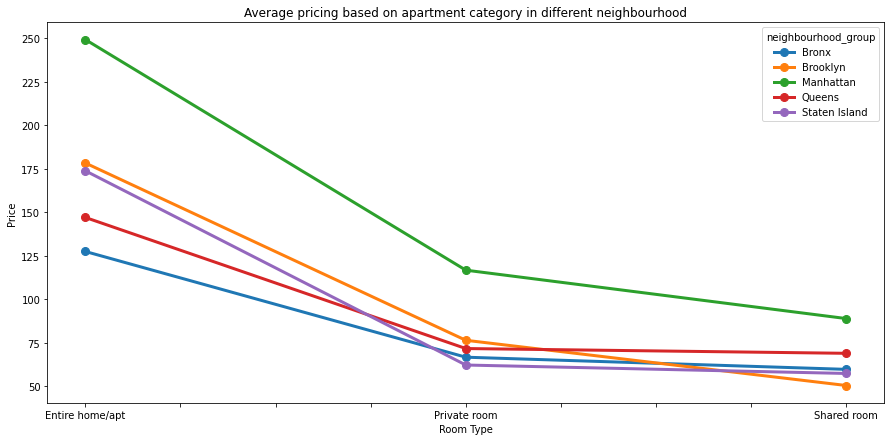

In [ ]:
plt.rcParams['figure.figsize'] = (15,7)
ap_plot= ap.plot(linewidth=3,markersize=8,marker='o',xlabel='Room Type',
                 ylabel='Price',
                 title='Average pricing based on apartment category in different neighbourhood')
ap_plot

####<b>Average stay time based on room type

In [ ]:
avg_stay=path.groupby(['room_type'])['minimum_nights'].mean().reset_index()
avg_stay

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


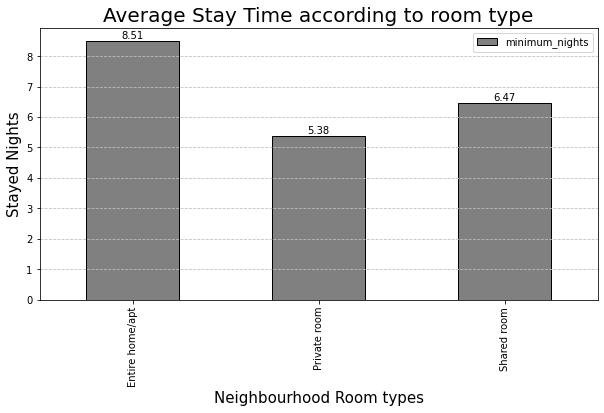

In [ ]:
plots=avg_stay.plot.bar(color ='gray', figsize=(10,5), edgecolor= 'black',x='room_type')
for bar in plots.patches:                                                      
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',              
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
  
plt.xlabel('Neighbourhood Room types', fontsize=15)                            
plt.ylabel('Stayed Nights', fontsize=15)                                       
plt.title('Average Stay Time according to room type', fontsize=20)            
plt.grid(axis='y',linestyle='--',color='0.75')                                  
plt.show()

##<b> 3. Which hosts are the busiest and why?

####<b>Top 10 active host & there neighbourhood

In [ ]:
data_table.disable_dataframe_formatter()
hosts_areas = path.groupby(['host_name', 'neighbourhood_group',])['calculated_host_listings_count'].count().reset_index()
hs= hosts_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(10)
hs

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
9856,Mike,Manhattan,134
432,Alex,Manhattan,134


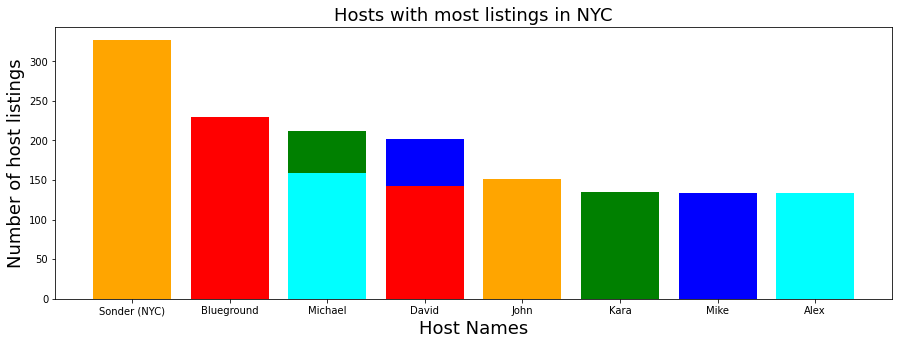

In [ ]:
# Visualizing the hosts with most listings.
plt.rcParams['figure.figsize'] = (15,5)
host_name = hs['host_name']
host_lisitng = hs['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.bar(host_name, host_lisitng, color=['orange', 'red', 'green', 'blue', 'cyan',])
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

List of top 10 hosts with highest number of listing counts. 
* In which, Sonder(NYC) is in the first position with 327 count, followed by Blueground and Michael at second and third position repectively.
* The major difference that can be observed in this bar plot is MICHAEL & DAVID had been more actively counted in two different neighbourhood groups.

##<b> 4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

####<b> Neighbourhood area map based on the location of each Room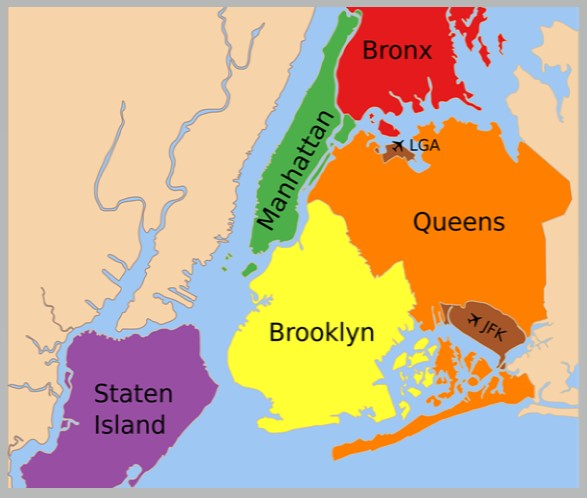

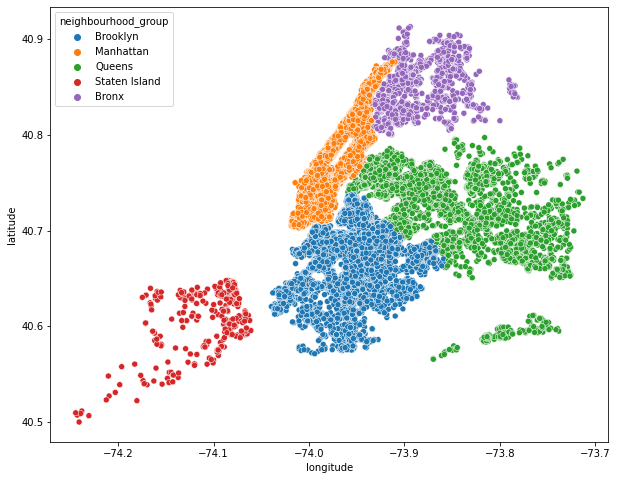

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(path.longitude,path.latitude,hue=path.neighbourhood_group)

Manhatten has less area as compared to the other neighbourhood groups but is very densely populated.

##<b>5. Where is the highest room availablility in neighbourhood group ?

####<b> Checking room availability based on neighbourhood

In [ ]:
data_table.disable_dataframe_formatter()
room_available = path.groupby(['neighbourhood_group', ])['availability_365'].count().reset_index()
room_available = room_available.sort_values(by= 'availability_365', ascending=False)
room_available

,neighbourhood_group,availability_365
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


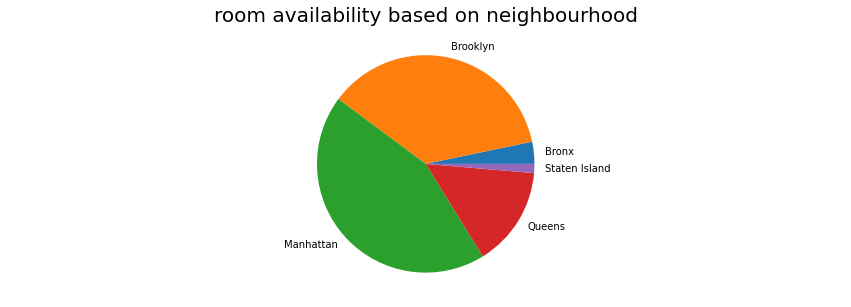

In [ ]:
sums = path.groupby(["neighbourhood_group", ])["availability_365"].sum()
axis('equal');
plt.rcParams['figure.figsize'] = (10,10)
plt.title('room availability based on neighbourhood', fontsize=20)
pie(sums, labels=sums.index,);
show()

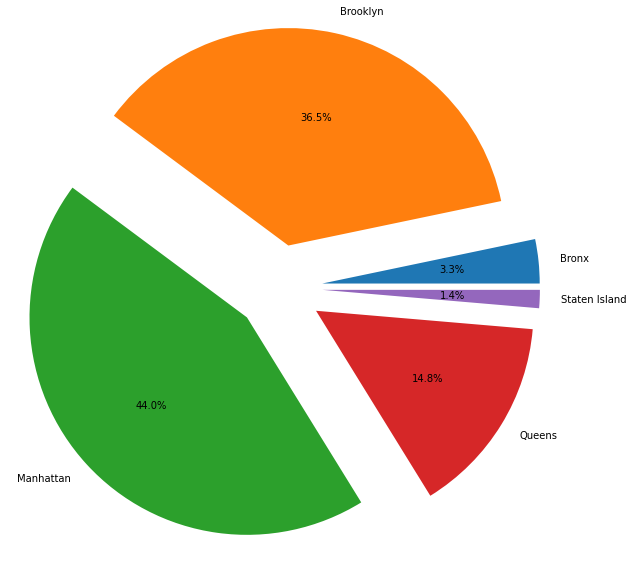

In [ ]:
explode = (0.2,0.2,0.2,0.2,0.2)
fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (10,10)
ax1.pie(sums, explode=explode,labels=sums.index,autopct='%1.1f%%',)
plt.show()

##### This pie chart shows the total number of neighbourhood listed in the data and the room available in percentage.
##### Manhattan has the highest rooms available with 44% in total and Staten Island has the least with only 1.4%.

####<b>Checking room availablity based on the room type

In [ ]:
room = path.groupby(['neighbourhood_group', 'room_type',])['availability_365'].count().reset_index()
room

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [ ]:
# Filtering data based on room type
ar = path.groupby(['neighbourhood_group', 'room_type',])['availability_365'].count().unstack().fillna(0)
ar

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0, 0.5, 'availability_365')

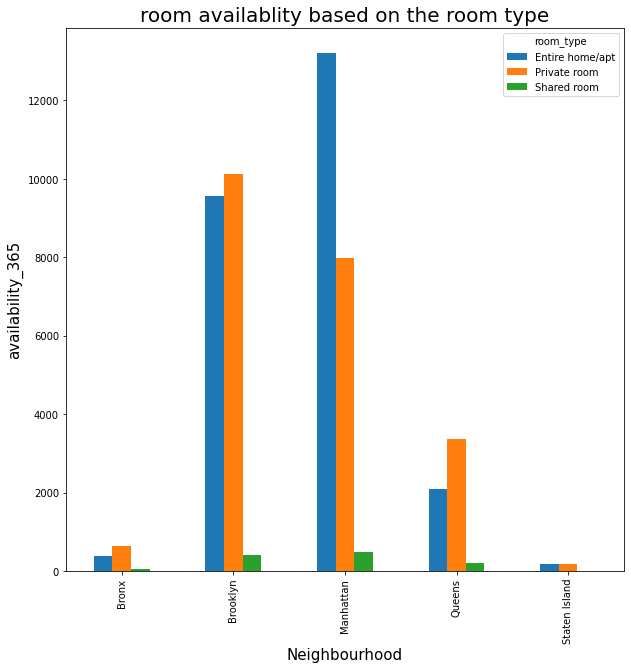

In [ ]:
sb=ar.plot(kind='bar', stacked=False)
plt.rcParams['figure.figsize'] = (15,7)
plt.title('room availablity based on the room type', fontsize=20)
plt.xlabel('Neighbourhood', fontsize=15)                            
plt.ylabel('availability_365', fontsize=15) 

Text(0.5, 0, 'availability_365')

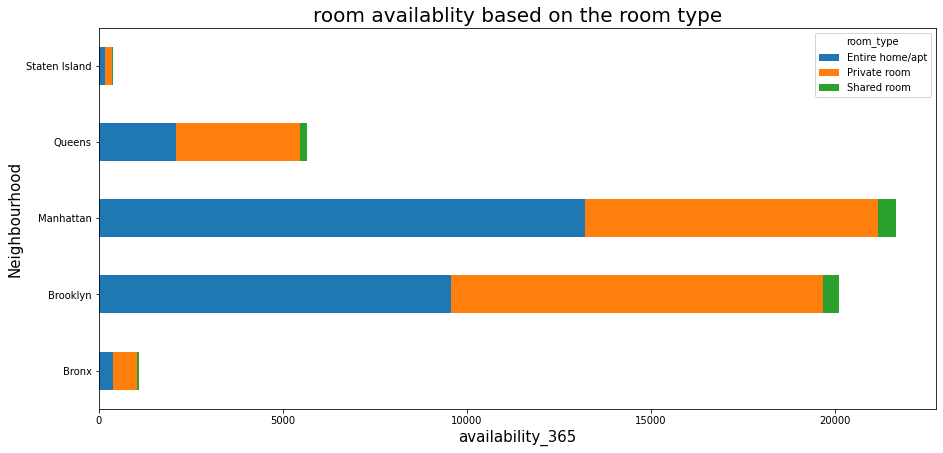

In [ ]:
sb=ar.plot(kind='barh', stacked=True)
plt.rcParams['figure.figsize'] = (15,7)
plt.title('room availablity based on the room type', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=15)                            
plt.xlabel('availability_365', fontsize=15) 

This graph gives the idea of different room types in the neighbourhood and there availability 

Entire-home/apt of every location have higher prices followed by private-rooms and shared-rooms.
* Manhattan is most demanded location followed by Brooklyn.
* Manhattan has more entire home/apt then other lotation but private roomsin Brooklyn are huge in numbers.

####<b>Top 10 most reviewed room and there location

In [ ]:
room_review = path.groupby(['name','neighbourhood_group','room_type' ])['number_of_reviews'].count().reset_index()
rr = room_review.sort_values(by= 'number_of_reviews', ascending=False).head(10)
rr

,name,neighbourhood_group,room_type,number_of_reviews
22242,Hillside Hotel,Queens,Private room,18
25933,Loft Suite @ The Box House Hotel,Brooklyn,Entire home/apt,11
4595,Artsy Private BR in Fort Greene Cumberland,Brooklyn,Private room,10
34484,Private room in Brooklyn,Brooklyn,Private room,8
34586,Private room in Williamsburg,Brooklyn,Private room,8
30908,NoName,Manhattan,Entire home/apt,6
34541,Private room in Manhattan,Manhattan,Private room,6
46178,West Village Apartment,Manhattan,Entire home/apt,6
5785,Beautiful Brooklyn Brownstone,Brooklyn,Entire home/apt,6
9384,Brooklyn Apartment,Brooklyn,Private room,6


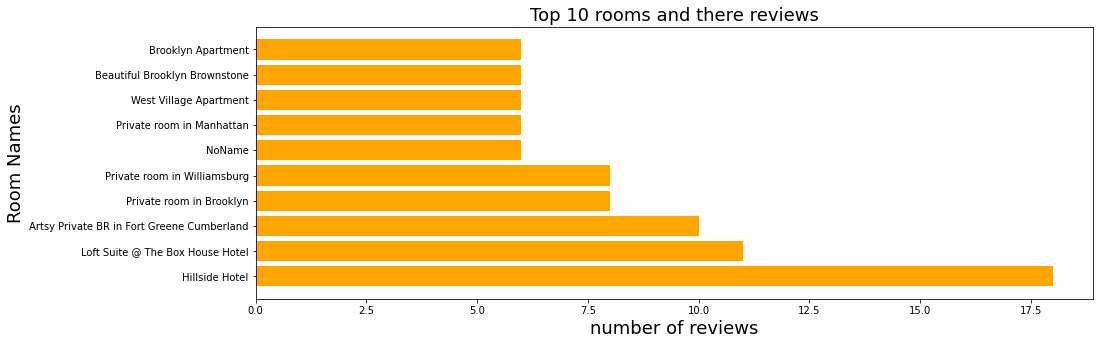

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
name = rr['name']
number_of_reviews = rr['number_of_reviews']
plt.barh(name, number_of_reviews, color=['orange'])
plt.title('Top 10 rooms and there reviews',{'fontsize':18})
plt.ylabel('Room Names',{'fontsize':18})
plt.xlabel('number of reviews',{'fontsize':18})
plt.show()

With this graph and table, 
* Hillside Hotel which is in Queens has the highest no of reviews count.
* Brooklyn has been in the top to get highest no of hotels with review count followed by Manhattan

#<b> D. Conclusion

1. Manhattan is the most expensive Neighbourhood, with less land area but has highest number of Hotels as well as highest customer count.
2. Staten Island has larger land area then Manhatten But still has less hotels and customer count.
3. Most of the people prefer Entire home/apt or private rooms, very few prefer shared rooms.
4. Brooklyn and Manhattan has the most hotels with high review count but Hillside Hotel, Queens has the highest review count in all.